In [2]:
import numpy as np
import scipy as sp
from scipy.stats import bernoulli, binom, norm
import matplotlib.pyplot as plt

## Statistical Models: Gaussian Model

Gaussian Probability Distribution is the most used distribution in all scientific experiments. Unlike Bernoulli, Binomial, or Poisson which are discrete, Gaussian is a continuous distribution.

\begin{align}
P(X=x) &= \frac{1}{\sigma\sqrt{2\pi}}\cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}\\
\text{where}&:\\
\mu &: \text{mean}\\
\sigma^2 &: \text{variance}:\\
x &: \text{continuous variable} \in -\infty \leq x \leq \infty\\
\end{align}

The probability of $P(X=x)$ of $x$ being in range of $[a,b]$ is given by the integral:
\begin{align}
P(a \leq x\leq b) &= \frac{1}{\sigma\sqrt{2\pi}} \cdot \int_{x=a}^{b} e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx\\
\end{align}

Note that analytical solution of x cannot be evaluated.

The total area under the curve is normalized to 1.
\begin{align}
P(-\infty \leq x\leq \infty) &= \frac{1}{\sigma\sqrt{2\pi}} \cdot \int_{-\infty}^{\infty} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx\\
&=1
\end{align}

**Probability** is associated by measurement of  $\vert \mu - n\sigma\vert$ from the mean by calculating the area under the curve outside this region.

\begin{align}
\left. \array{
n\cdot\sigma & \text{P of exceeding}  \pm n\sigma\\
0.67&0.5\\
1 & 0.32\\
2 & 0.05\\
3 & 0.003\\
4 & 0.00006\\
}\right.
\end{align}

In a typical experiment, we can say "It is very unlikely ($\lt 0.3\%$) that a mesurement taken from a Gaussian PDF will be more than $\pm 3\sigma$ from the true mean of the distribution."

(1000,)


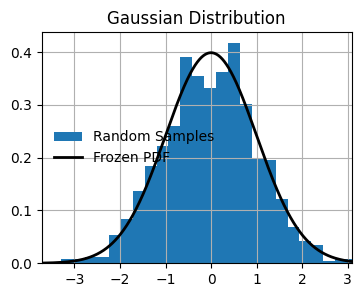

In [11]:
N = 1000
x = np.linspace(norm.ppf(0.0001), norm.ppf(0.999), N)
print(np.shape(x))
fig, ax = plt.subplots(1, 1, figsize=(4,3))

# Generate random samples
r = norm.rvs(size=N)
ax.hist(r, density=True, bins="auto", label="Random Samples")

# Frozen PDF
rv = norm()
y = rv.pdf(x)
ax.plot(x, y, 'k-', lw=2, label='Frozen PDF')
ax.set_title("Gaussian Distribution")
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.grid(":")
plt.show()

### Relationship with Binomial Distribution
The Gaussian Distribution can be derived from Binomial(or Poisson) assuming:
- p is finite
- N is very large
- The variable is continuous rather than discrete

**Example** Consider tossing a coin for 1000 times

$p(X=Head) = 0.5$

$N = 1000$


For **Binomial Distribution**
- Mean number of Heads = $\mu = N\cdot p  = 1000 \times 0.5  = 500$
- Standard deviation: $\sigma = [N\cdot p(1-p)]^{\frac{1}{2}}=15.811$
- Probability to be within $\pm 1\sigma$, the distribution is:
\begin{align}
P\big((\mu-\sigma) \lt x \lt (\mu+\sigma)\big) = \sum_{m=500-15.8}^{500+15.8} \frac{10^3 !}{(10^3-m)!m!} 0.5^m \cdot 0.5 ^{10^3-m}
\end{align}

mu=500.000, sigma=15.811
Limits a: 484.189 b: 515.811


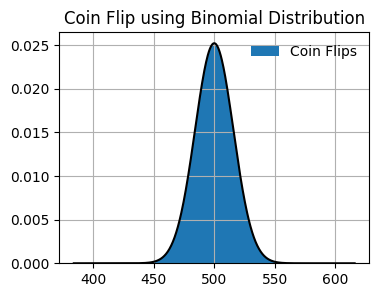

In [12]:
# Number of flips
N = 1000
# Probability
p = 0.5
mu = N*p
var = N*p*(1-p)
sigma = np.sqrt(var)
print(f"mu={mu:.3f}, sigma={sigma:.3f}")

func = lambda m: sp.special.comb(N,m)*0.5**m * 0.5**(N-m)
a = mu-sigma
b = mu+sigma
P = func(a) + func(b)
# Caveat: N might be too small here, larger N is not being handled by factorial properly
print(f"Limits a: {a:.3f} b: {b:.3f}")

fig, ax = plt.subplots(1,1,figsize=(4,3))
x, dx = np.linspace(a-100, b+100, 500, retstep=True)
y = func(x)
ax.bar(x, y, label="Coin Flips")
ax.plot(x, y, color="black")
ax.set_title("Coin Flip using Binomial Distribution")
plt.grid(":")
plt.legend(loc="best", frameon=False)
plt.show()

In [6]:
# Calculate the area under the curve
f = lambda x: np.exp(-((x-mu)/sigma)**2/2) / sigma / np.sqrt(2 * np.pi)
# Filter the lower and upper bounds
x_i = [i for i in x if i >= a and i <= b]
x_i = [f(x) for x in x_i]
x_i = [x*dx for x in x_i]
P = np.sum(x_i)
print(f"Probability: {P:.6f}")

Probability: 0.681804


For the **Gaussian Distribution**
\begin{align}
P\big((\mu-\sigma) \lt x \lt (\mu+\sigma)\big)=\frac{1}{\sigma\sqrt{2\pi}} \int_{\mu-\sigma}^{\mu+\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx \approx 0.68
\end{align}

Probability: 0.682673


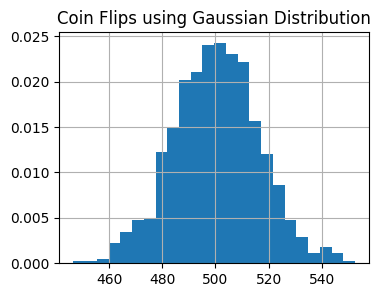

In [13]:
# 2. Calculate P using the Gaussian Distribution
# 27.056 is the approximate integral with the limits of [mu-sigma, mu+sigma]
# Approximate of the integral term: 27.05655452041353
val = 1/(sigma*np.sqrt(2*np.pi))*27.05655452041353
print(f"Probability: {val:.6f}")

# Plot the same using Gaussian Distribution
model = norm(mu,sigma)
r = model.rvs(size=N)
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.hist(r, density=True, bins="auto", label="Random Samples")
ax.set_title("Coin Flips using Gaussian Distribution")
plt.grid(":")
plt.show()

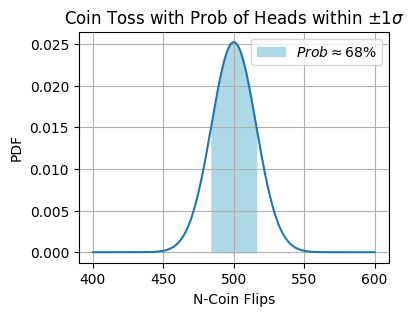

In [14]:
# Plot the curve
x = np.linspace(400, 600, 1000)
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(x, norm.pdf(x, mu, sigma))
# Probability
x = np.linspace(a, b, 200)
ax.fill_between(x, norm.pdf(x,mu,sigma),color="lightblue", label=r"$Prob \approx 68\%$")
ax.set_ylabel("PDF")
ax.set_xlabel("N-Coin Flips")
plt.grid(":")
plt.title(r"Coin Toss with Prob of Heads within $\pm 1\sigma$")
plt.legend()
plt.show()